In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

# Import API key
from api_keys import api_key

In [47]:
oscar_data= pd.read_csv("Resources/oscar_data.csv")
oscar_data.head()

,Year,Host,Most Nominations,Most Wins,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4,Nominee 5,...,Best Costume Design (Black and White),Nominee 1.31,Nominee 2.31,Nominee 3.30,Nominee 4.30,Best Costume Design (Color),Nominee 1.32,Nominee 2.32,Nominee 3.31,Nominee 4.31
0,1927/28,Douglas Fairbanks,Seventh Heaven (5),Seventh Heaven AND Sunrise: A Song of Two Huma...,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness,The Crowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928/29,William C. DeMille,In Old Arizona AND The Patriot (5),None (No Film Won More Than One Award),The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929/30,Conrad Nagel,The Love Parade (6),All Quiet on the Western Front AND The Big Hou...,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930/31,Lawrence Grant,Cimarron (7),Cimarron (3),Cimarron,East Lynne,The Front Page,Skippy,Trader Horn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1931/32,Conrad Nagel,Arrowsmith AND The Champ (4),Bad Girl AND The Champ (2),Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final,One Hour with You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
nominees = oscar_data[["Year", "Best Picture", "Nominee 1", "Nominee 2", "Nominee 3", "Nominee 4"]]
nominees

,Year,Best Picture,Nominee 1,Nominee 2,Nominee 3,Nominee 4
0,1927/28,Wings,The Racket,Seventh Heaven,Unique and Artistic Production- Sunrise: A Son...,Chang: A Drama of the Wilderness
1,1928/29,The Broadway Melody,Alibi,Hollywood Revue,In Old Arizona,The Patriot
2,1929/30,All Quiet on the Western Front,The Big House,Disraeli,The Divorcee,The Love Parade
3,1930/31,Cimarron,East Lynne,The Front Page,Skippy,Trader Horn
4,1931/32,Grand Hotel,Arrowsmith,Bad Girl,The Champ,Five Star Final
...,...,...,...,...,...,...
91,2019,Parasite,1917,Ford v Ferrari,The Irishman,Jojo Rabbit
92,2020,Nomadland,The Father,Judas and the Black Messiah,Mank,Minari
93,2021,CODA,Belfast,Don't Look Up,Drive My Car,Dune
94,2022,Everything Everywhere All At Once,All Quiet on the Western Front,Avatar: The Way of Water,The Banshees of Inisherin,Elvis


In [52]:
base_url = "https://api.themoviedb.org/3/"

startdate = "2022-11-01"
enddate = "2022-12-01"

all_movies_response = requests.get(f'{base_url}/discover/movie?include_adult=false&include_video=false&primary_release_date.gte={startdate}&primary_release_date.lte={enddate}&with_original_language=en&api_key={api_key}').json()
print(json.dumps(all_movies_response, indent=4, sort_keys=True))

{
    "page": 1,
    "results": [
        {
            "adult": false,
            "backdrop_path": "/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg",
            "genre_ids": [
                28,
                12,
                878
            ],
            "id": 505642,
            "original_language": "en",
            "original_title": "Black Panther: Wakanda Forever",
            "overview": "Queen Ramonda, Shuri, M\u2019Baku, Okoye and the Dora Milaje fight to protect their nation from intervening world powers in the wake of King T\u2019Challa\u2019s death.  As the Wakandans strive to embrace their next chapter, the heroes must band together with the help of War Dog Nakia and Everett Ross and forge a new path for the kingdom of Wakanda.",
            "popularity": 123.97,
            "poster_path": "/sv1xJUazXeYqALzczSZ3O6nkH75.jpg",
            "release_date": "2022-11-09",
            "title": "Black Panther: Wakanda Forever",
            "video": false,
            "vote_average": 7.1

In [23]:
movie_ids = []
for i in range(len(all_movies_response["results"])):
    movie_id = all_movies_response["results"][i]["id"]
    movie_ids.append(movie_id)
    print(movie_id)

505642
661374
338958
457232
829280
593643
1013860
899112
804095
668482
774752
1036561
877269
653851
1001865
1037858
1035057
988233
814338
819504


In [28]:
id =[]
title = []
vote = []
release_date = []

for movie_id in movie_ids:
    
    movie_response = requests.get(f'{base_url}/movie/{movie_id}?api_key={api_key}').json()
    
    try:
        title.append(movie_response["original_title"])
        print(f'Title = {movie_response["original_title"]}')
    except: KeyError

    try:
        vote.append(movie_response["vote_average"])
        print(f'Average Vote = {movie_response["vote_average"]}')
    except: KeyError

    try:
        release_date.append(movie_response["release_date"])
        print(f'Release Date = {movie_response["release_date"]}')
    except: KeyError

Title = Black Panther: Wakanda Forever
Average Vote = 7.142
Release Date = 2022-11-09
Title = Glass Onion: A Knives Out Mystery
Average Vote = 7.052
Release Date = 2022-11-12
Title = Disenchanted
Average Vote = 6.792
Release Date = 2022-11-18
Title = Lamborghini: The Man Behind the Legend
Average Vote = 6.46
Release Date = 2022-11-18
Title = Enola Holmes 2
Average Vote = 7.42
Release Date = 2022-11-30
Title = The Menu
Average Vote = 7.19
Release Date = 2022-11-17
Title = R.I.P.D. 2: Rise of the Damned
Average Vote = 6.36
Release Date = 2022-11-15
Title = Violent Night
Average Vote = 7.383
Release Date = 2022-11-30
Title = The Fabelmans
Average Vote = 7.651
Release Date = 2022-11-11
Title = Roald Dahl's Matilda the Musical
Average Vote = 6.775
Release Date = 2022-11-25
Title = The Guardians of the Galaxy Holiday Special
Average Vote = 7.186
Release Date = 2022-11-25
Title = Shadow Master
Average Vote = 6.745
Release Date = 2022-11-03
Title = Strange World
Average Vote = 6.365
Release Da

In [29]:
df = pd.DataFrame({"ID" : movie_ids,
                   "Title" : title,
                   "Vote" : vote,
                   "Release Date" : release_date})
df

,ID,Title,Vote,Release Date
0,505642,Black Panther: Wakanda Forever,7.142,2022-11-09
1,661374,Glass Onion: A Knives Out Mystery,7.052,2022-11-12
2,338958,Disenchanted,6.792,2022-11-18
3,457232,Lamborghini: The Man Behind the Legend,6.460,2022-11-18
4,829280,Enola Holmes 2,7.420,2022-11-30
5,593643,The Menu,7.190,2022-11-17
6,1013860,R.I.P.D. 2: Rise of the Damned,6.360,2022-11-15
7,899112,Violent Night,7.383,2022-11-30
8,804095,The Fabelmans,7.651,2022-11-11
9,668482,Roald Dahl's Matilda the Musical,6.775,2022-11-25


In [43]:
df = df.sort_values("Release Date")
df

,ID,Title,Vote,Release Date
17,988233,Hex,5.800,2022-11-01
11,1036561,Shadow Master,6.745,2022-11-03
0,505642,Black Panther: Wakanda Forever,7.142,2022-11-09
15,1037858,The Soccer Football Movie,5.853,2022-11-09
8,804095,The Fabelmans,7.651,2022-11-11
1,661374,Glass Onion: A Knives Out Mystery,7.052,2022-11-12
6,1013860,R.I.P.D. 2: Rise of the Damned,6.360,2022-11-15
5,593643,The Menu,7.190,2022-11-17
2,338958,Disenchanted,6.792,2022-11-18
3,457232,Lamborghini: The Man Behind the Legend,6.460,2022-11-18


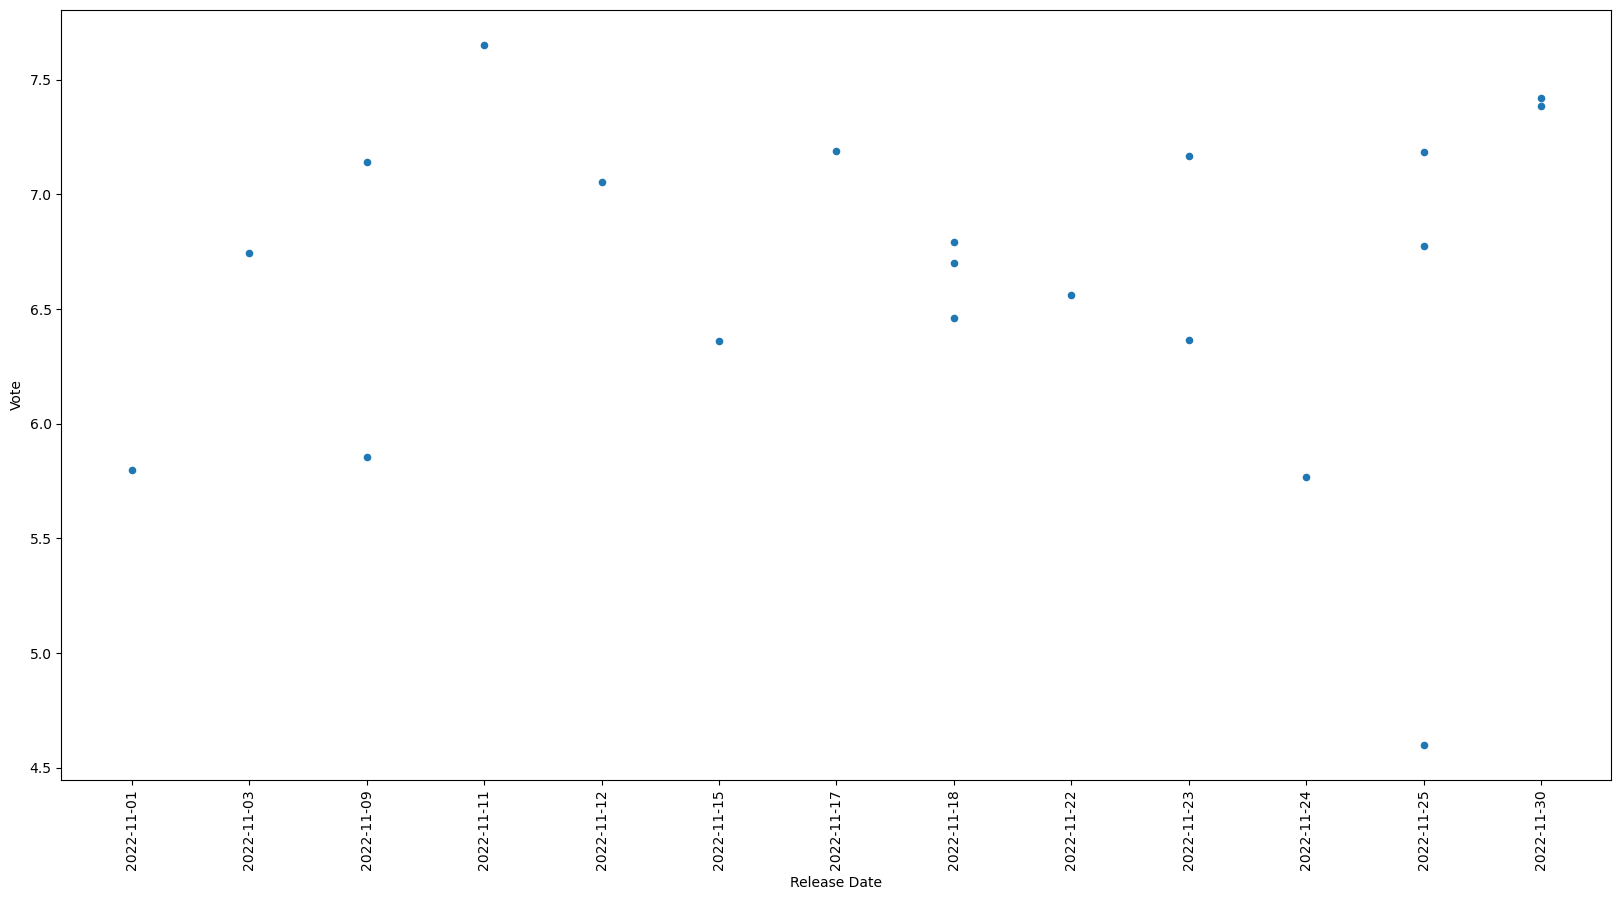

In [45]:
df.plot(kind="scatter", x="Release Date", y="Vote", rot=90, figsize=(20,10))
plt.show()